# Proyecto Final Algebra Lineal 2017
---

El proyecto del curso consiste en la implementación del [Algortimo de Canny](https://es.wikipedia.org/wiki/Algoritmo_de_Canny) para la detección de bordes en imágenes y videos. Para ello, se le entrega al estudiante toda la implementación del algoritmo en [OpenCV](http://opencv.org/) y su objetivo es **implementar las funciones de OpenCV con matrices**. 

Las funciones a modificar serán las siguientes:
```python
cv2.GaussianBlur()
cv2.Sobel()
```

No es necesario que modifique más del código que se le solicita, pero puede hacer las modificaciones pertinentes si ese fuera el caso. Dentro del código se le indica en qué parte debe de ser modificado, por ejemplo:

```python
'''Modificar esta función'''
    sobel = cv2.Sobel(img, cv2.CV_64F, x, y, ksize=sobel_kernel)
``` 

Se recomienda buscar maneras de optimizar los cálculos de sus filtros, pues más adelante existe una aplicación en tiempo real donde es crucial que sus cálculos sean lo más rápidos posibles. Las dimensiones de los *kernels* no pueden ser modificadas.

## 0. Conceptos
Para poder modificar las funciones solicitadas es necesario que comprenda algunos conceptos, por lo cual es necesario que defina:

1. ¿En que consiste la convolución y cómo puede ser calculada? (Puede dar una definición matemática y/o ejemplos).

2. ¿Qué es el *kernel* de un filtro y para que se utiliza?

3. ¿En qué consiste un filtro Gaussiano?

4. ¿En qué consiste el Filtro Sobel? ¿para qué sirve?

3. Describa el algoritmo de detección de bordes Canny.

# Checked

In [1]:
import numpy as np
np.seterr(over='ignore', divide='ignore')
import matplotlib.pylab as plt
import cv2
import math
import time

from moviepy.editor import VideoFileClip
from IPython.display import HTML

%matplotlib inline

In [2]:
def gaussian_blur(A, kernel = 5): 
  #  tiempoIn = time.time()
    width, height = A.shape
  #  print 'size: ', width,' x ', height,
    A = A.astype(np.float)
    B = A
    for j in range(2,height-2): 
        for i in range(2,width-2):
            B[i,j] = math.floor((0.000252*(A[i-2,j-2]+A[i+2,j-2]+A[i-2,j+2]+A[i+2,j+2])) + (0.00352*(A[i-1,j-2]+A[i+1,j-2]+A[i-1,j+2]+A[i+1,j+2]+A[i-2,j-1]+A[i+2,j-1]+A[i+2,j+1]+A[i-2,j+1])) + (0.008344*(A[i,j-2]+A[i,j+2]+A[i-2,j]+A[i+2,j])) + (0.049081*(A[i-1,j-1]+A[i+1,j-1]+A[i-1,j+1]+A[i+1,j+1])) +(0.11634*(A[i,j-1]+A[i-1,j]+A[i+1,j]+A[i,j+1])) +(0.275768*A[i,j]))   
  #  print 'gaussian_blur two for: ', time.time() - tiempoIn, ' segundos'
    return B

In [3]:
def sobel_filter(A, x, y, sobel_kernel=3):
  #  tiempoIn = time.time()
    width, height = A.shape
    A = A.astype(np.float)
    B = np.zeros((width, height))
    if x == 1:
        for j in range(1, height-1): 
            for i in range(1, width-1):
                B[i,j] = (2*A[i+1,j] + A[i+1,j+1] + A[i+1,j-1] - (A[i-1,j-1] + A[i-1,j+1] + 2*A[i-1,j]))
    else:
        for j in range(1, height-1): 
            for i in range(1, width-1):
                B[i,j] = (A[i+1,j-1] + A[i-1,j-1] + 2*A[i,j-1] - (A[i-1,j+1] + A[i+1,j+1] + 2*A[i,j+1]))
  #  print x, y, 'sobel_filter: ', time.time() - tiempoIn, ' segundos'       
    return B

In [4]:
#def gaussian_blur(img, kernel = 5):
 #   '''Modificar esta función'''
#   return cv2.GaussianBlur(img,(kernel,kernel),0)
#def sobel_filter (img, x, y, sobel_kernel= 3):
  #  '''Modificar esta función'''
 #   return cv2.Sobel(img, cv2.CV_64F, x, y,sobel_kernel)

global glbsobelx, glbsobely

def C(image,sobel_kernel=3):
    global glbsobelx, glbsobely
    glbsobelx = sobel_filter(image, 1, 0, sobel_kernel)
    glbsobely = sobel_filter(image, 0, 1, sobel_kernel)
    

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    if orient == 'x':
        x,y = 1,0
        sobel = glbsobelx
    elif orient == 'y':
        x,y = 0,1
        sobel = glbsobely
        
    '''Modificar esta función'''
    #sobel = sobel_filter(img, x, y, sobel_kernel)
    
    # Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)

    # Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a mask of 1's where the scaled gradient magnitude 
    # is > thresh_min and < thresh_max
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
  #  print 'abs_sobel_thresh done'
    return sbinary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Take the gradient in x and y separately
    '''Modificar esta función'''
    #sobelx = sobel_filter(image, 1, 0, sobel_kernel)
    sobelx = glbsobelx
    '''Modificar esta función'''
    #sobely = sobel_filter(image, 0, 1, sobel_kernel)
    sobely = glbsobely
    
    # Calculate the magnitude 
    abs_sobel = np.sqrt(sobelx**2 +sobely**2)

    # Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a binary mask where mag thresholds are met
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
  #  print 'mag_thresh done'
    return sbinary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Take the gradient in x and y separately
    '''Modificar esta función'''
    #sobelx = sobel_filter(image, 1, 0, sobel_kernel)
    sobelx = glbsobelx
    '''Modificar esta función'''
    #sobely = sobel_filter(image, 0, 1, sobel_kernel)
    sobely = glbsobely
    
    # Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)   
    abs_sobely = np.absolute(sobely)
    
    # Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    grad_dir = np.arctan2(abs_sobely, abs_sobelx)
    
    # Create a binary mask where direction thresholds are met
    sbinary = np.zeros_like(grad_dir)
    sbinary[(grad_dir >= thresh[0]) & (grad_dir <= thresh[1])] = 1
  #  print 'dir_threshhold done'
    return sbinary

# 1. Prueba en Imagen

In [8]:
start_time = time.time()
# Test filter on single image:
# BTD, hulk, pancakes, buzz, desk, spaceship, lizard, space, rick
im = plt.imread("BTD.jpg")
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

# Gaussian Blur Filtering
gray = gaussian_blur(gray, kernel = 5)

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
C(gray)
gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=ksize, thresh=(40, 110))
grady = abs_sobel_thresh(gray, orient='y', sobel_kernel=ksize, thresh=(40, 110))
mag_binary = mag_thresh(gray, sobel_kernel=ksize, mag_thresh=(30, 90))
dir_binary = dir_threshold(gray, sobel_kernel=ksize, thresh=(0, np.pi/2))

# Create combined image with sobel filters applied
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

rgb_combined = np.asarray(np.dstack((combined, combined, combined)), dtype=np.float64)
hours, rem = divmod(time.time()-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:03:49.81


00:03:49.81


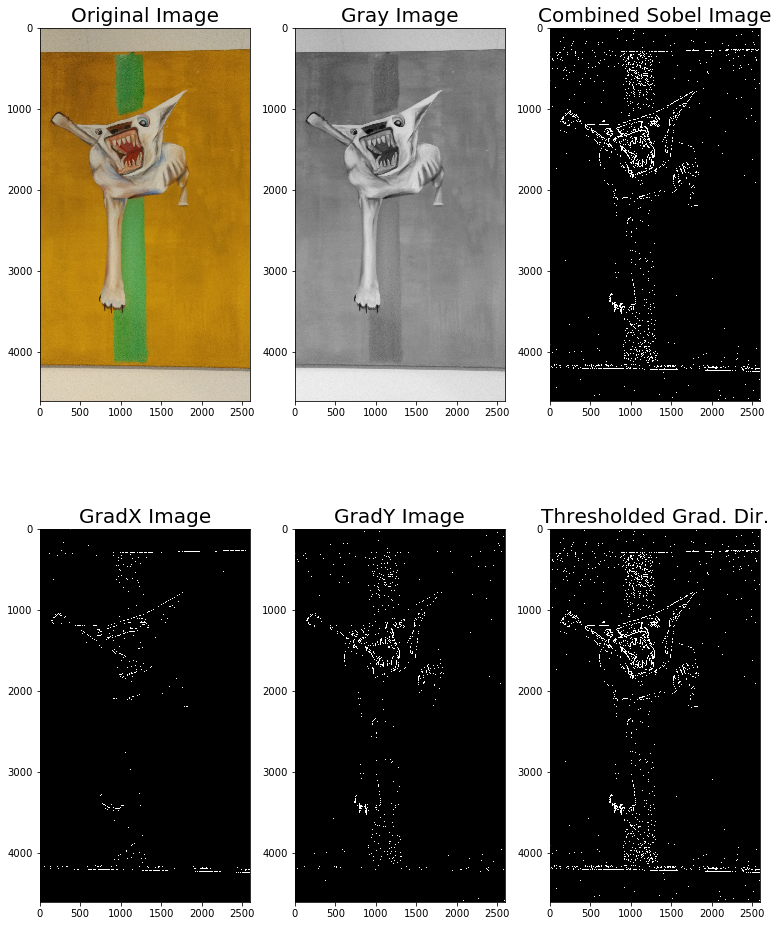

00:04:04.56


In [9]:
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))
# Plot the result
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10, 15))
f.tight_layout()
ax1.imshow(im)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(gray, cmap='gray')
ax2.set_title('Gray Image', fontsize=20)
ax3.imshow(rgb_combined, cmap='gray')
ax3.set_title('Combined Sobel Image', fontsize=20)
ax4.imshow(gradx, cmap='gray')
ax4.set_title('GradX Image', fontsize=20)
ax5.imshow(grady, cmap='gray')
ax5.set_title('GradY Image', fontsize=20)
ax6.imshow(((mag_binary == 1) & (dir_binary == 1)), cmap='gray')
ax6.set_title('Thresholded Grad. Dir.', fontsize=20)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show() 
hours, rem = divmod(time.time()-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

## 2. Prueba en Videos

In [5]:
def process_image(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = gaussian_blur(gray, kernel = 5)
    # Choose a Sobel kernel size
    ksize = 3 # Choose a larger odd number to smooth gradient measurements

    # Apply each of the thresholding functions
    C(gray)
    gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=ksize, thresh=(50, 100))
    grady = abs_sobel_thresh(gray, orient='y', sobel_kernel=ksize, thresh=(50, 100))
    mag_binary = mag_thresh(gray, sobel_kernel=ksize, mag_thresh=(20, 100))
    dir_binary = dir_threshold(gray, sobel_kernel=ksize, thresh=(0, np.pi/4))
    
    combined = np.zeros_like(dir_binary)
    combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    
    rgb_combined = np.asarray(np.dstack((combined, combined, combined)), dtype=np.uint8)
    
    retval, threshold = cv2.threshold(rgb_combined, 0, 255, cv2.THRESH_BINARY)
    
    return threshold

In [6]:
filter_output = 'Batman_Filter.mp4'
clip1 = VideoFileClip("Batman.mp4")
batman_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time batman_clip.write_videofile(filter_output, audio=False)


MoviePy: building video file Batman_Filter.mp4
----------------------------------------

Writing video into Batman_Filter.mp4
|----------| 0/265   0% [elapsed: 00:00 left: ?, ? iters/sec]

C:\Users\sebas\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in divide
C:\Users\sebas\Anaconda2\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in divide


Done writing video in Batman_Filter.mp4 !                                
Your video is ready !
Wall time: 1h 17min 24s


In [7]:
HTML("""
<video width="720" height="480" controls>
  <source src="{0}">
</video>
""".format(filter_output))

# live stream

In [ ]:
cap = cv2.VideoCapture(0)  # 0 for Python 3, 1 for Python 2. No idea why?!!

out = cv2.VideoWriter('output.avi',cv2.cv.CV_FOURCC('M','J','P','G'), 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,180)
        new_frame = process_image(frame)
        out.write(new_frame)

        cv2.imshow('frame',new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

# T

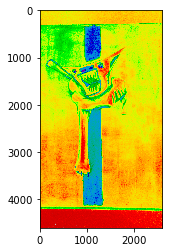

In [10]:
imgplot = plt.imshow(im)
lum_img = im[:,:,0]
plt.imshow(lum_img, cmap="hot")
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')


# T. live stream

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def proceesT(im):
    imgplot = plt.imshow(im)
    lum_img = im[:,:,0]
    plt.imshow(lum_img, cmap="hot")
    imgplot = plt.imshow(lum_img)
    imgplot.set_cmap('nipy_spectral')
    img = np.asarray(imgplot)
    return img

In [ ]:
cap = cv2.VideoCapture(0)  # 0 for Python 3, 1 for Python 2. No idea why?!!

out = cv2.VideoWriter('output.avi',cv2.cv.CV_FOURCC('M','J','P','G'), 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,180)
        new_frame = proceesT(frame)
        out.write(new_frame)

        cv2.imshow('frame',new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

# Prototypes

In [ ]:
def gaussian_blur(A, kernel = 5): #one for
  #  tiempoIn = time.time()
    width, height = A.shape
    B = A
    A = A.astype(np.float)
    lf = (height * width - (2 * width) )
    li = (2 * width + 2)
    w = (width - 2)
  #  print 'size: ', width,' x ', height, ' lf: ', lf
    for l in range( li, lf):  
        i = abs(l % w) 
        j = l / width 
        B[i,j] = ((0.000252*(A[i-2,j-2]+A[i+2,j-2]+A[i-2,j+2]+A[i+2,j+2])) + (0.00352*(A[i-1,j-2]+A[i+1,j-2]+A[i-1,j+2]+A[i+1,j+2]+A[i-2,j-1]+A[i+2,j-1]+A[i+2,j+1]+A[i-2,j+1])) + (0.008344*(A[i,j-2]+A[i,j+2]+A[i-2,j]+A[i+2,j])) + (0.049081*(A[i-1,j-1]+A[i+1,j-1]+A[i-1,j+1]+A[i+1,j+1])) +(0.11634*(A[i,j-1]+A[i-1,j]+A[i+1,j]+A[i,j+1])) +(0.275768*A[i,j]))   
    
  #  print 'gaussian_blur one for: ', time.time() - tiempoIn, ' segundos'
    return B

In [ ]:
def sobel_filter(A, x, y, sobel_kernel=3): #one for
    tiempoIn = time.time()
    width, height = A.shape
    A = A.astype(np.float)
    B = np.zeros((width, height))
    lf = (height * width - (2 * width) )
    li = (2 * width + 2)
    w = (width - 2)
    if x == 1:
        for l in range( li, lf):  
            i = abs(l % w) 
            j = l / width 
            B[i,j] = math.ceil(2*A[i+1,j] + A[i+1,j+1] + A[i+1,j-1] - (A[i-1,j-1] + A[i-1,j+1] + 2*A[i-1,j]))
    if y== 1:
        for l in range( li, lf):  
            i = abs(l % w) 
            j = l / width 
            B[i,j] = math.ceil(A[i+1,j-1] + A[i-1,j-1] + 2*A[i,j-1] - (A[i-1,j+1] + A[i+1,j+1] + 2*A[i,j+1]))
  #  print x, y, 'sobel_filter: ' , time.time() - tiempoIn, ' segundos'       
    return B

In [ ]:
def karatsuba(x, y):
    if x.bit_length() <= 1024 or y.bit_length() <= 1024:  
        total = 0
        yy = [int(i) for i in str(y)]
        for i, yyy in enumerate(yy[::-1]):
            total += x * yyy * (10 ** i)
        return total
    else:
        n = max(x.bit_length(), y.bit_length())
        half = (n + 32) // 64 * 32
        mask = (1 << half) - 1
        xlow = x &amp; mask
        ylow = y &amp; mask
        xhigh = x >> half
        yhigh = y >> half
        a = karatsuba(xhigh, yhigh)
        b = karatsuba(xlow + xhigh, ylow + yhigh)
        c = karatsuba(xlow, ylow)
        d = b - a - c
        return (((a << half) + d) << half) + c
    
def gaussian_blur(A, kernel = 5):
    tiempoIn = time.time()
    width, height = A.shape
    B = A
    lf = (height * width - (2 * width) )
    li = (2 * width + 2)
    w = (width - 2)
    print 'size: ', width,' x ', height, ' lf: ', lf
    for l in range( li, lf):  
        i = abs(l % w) 
        j = l / width 
        B[i,j] = ( karatsuba(252,(A[i-2,j-2]+A[i+2,j-2]+A[i-2,j+2]+A[i+2,j+2])) +  karatsuba(352,(A[i-1,j-2]+A[i+1,j-2]+A[i-1,j+2]+A[i+1,j+2]+A[i-2,j-1]+A[i+2,j-1]+A[i+2,j+1]+A[i-2,j+1])) +  karatsuba(8344,(A[i,j-2]+A[i,j+2]+A[i-2,j]+A[i+2,j])) +  karatsuba(49081,(A[i-1,j-1]+A[i+1,j-1]+A[i-1,j+1]+A[i+1,j+1])) + karatsuba(11634,(A[i,j-1]+A[i-1,j]+A[i+1,j]+A[i,j+1])) + karatsuba(275768,A[i,j]))/1000000   
  
    print 'gaussian_blur kara: ', time.time() - tiempoIn, ' segundos'
    return B

In [ ]:
kernel = np.array([[ 0.,  -1.,  0.],
                        [ -1.,  4.,  -1.],
                        [ 0.,  -1.,  0.]])
    
kernel = np.array([[ 1.,  4.,  7., 4., 1.],
                        [ 4.,  16.,  26., 16., 4.],
                        [ 7.,  26.,  41., 26., 7.],
                        [ 4.,  16.,  26., 16., 4.],
                        [1.,  4.,  7., 4., 1.]])